# Vectors' attributes distribution analysis

- Distribution of values among particular vector space attributes by attributes' means - yes, it's as simple as that

In [62]:
!ls -lah ../vectors/modif

total 1,9G
drwxr-xr-x 2 michal michal 4,0K bře  9 23:07 .
drwxr-xr-x 3 michal michal 4,0K bře  9 18:22 ..
-rw-r--r-- 1 michal michal 389M bře  9 19:56 1b600_vectors_sample1e4_nonbin
-rw-r--r-- 1 michal michal 389M bře  9 22:07 1b600_vectors_sample1e4_nonbin_sigm_sumloss
-rw-r--r-- 1 michal michal 389M bře  9 22:33 1b600_vectors_sample1e4_nonbin_sigm_sumloss_pow
-rw-r--r-- 1 michal michal 389M bře  9 21:26 1b600_vectors_sample1e4_nonbin_sumloss
-rw-r--r-- 1 michal michal 389M bře  9 23:11 1b600_vectors_sample1e4_nonbin_sumloss_pow


## Original vectors

In [38]:
import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/1b600d_vectors_e10_sample1e4_nonbin", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
the,0,0,1,1,0,0,1,0,1,1,...,0,1,1,1,0,1,1,1,0,1
of,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,1
and,0,0,1,1,0,1,1,0,0,0,...,0,1,1,1,0,0,1,1,0,1
one,0,0,0,1,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,1
in,0,1,1,1,1,0,1,0,1,0,...,1,1,0,1,1,0,0,1,1,1
a,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,1,1
to,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,1
zero,0,0,0,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0
nine,0,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,1,1,1,0,1


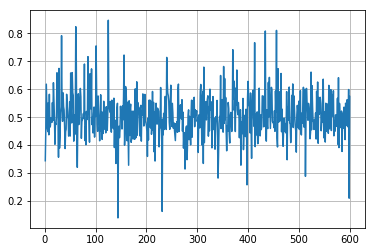

In [39]:
vecs_df.mean().plot(grid=True)

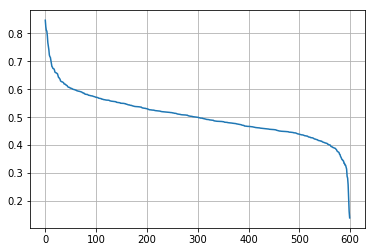

In [40]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

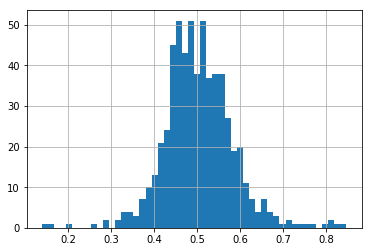

In [41]:
vecs_df.mean().hist(bins=50)

## Modifications:

### 1. Variable learning rate: for a bit i: alpha[i] = current_alpha * 1/i

In [5]:
import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_sample1e4_nonbin", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,1,0,0,0,0,0,0,0,1,1,...,1,1,1,1,0,0,1,1,1,1
of,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
and,1,0,0,0,0,0,0,0,1,1,...,1,1,0,0,1,0,1,1,0,0
one,1,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,1,0,0,0
in,1,0,0,0,0,0,0,0,1,1,...,1,1,0,0,1,1,0,0,1,1
a,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,1,0,1,1
to,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,1,1,0
zero,1,0,0,0,0,0,0,0,1,1,...,0,1,1,0,1,0,1,0,0,1


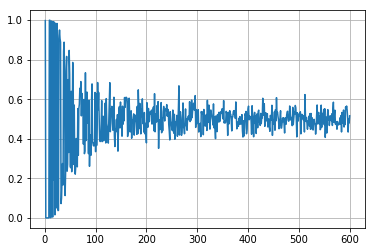

In [57]:
vecs_df.mean().plot(grid=True)

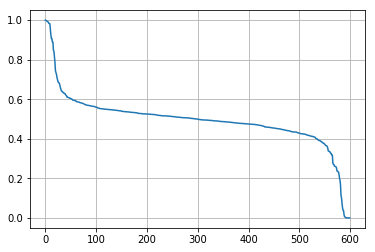

In [58]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

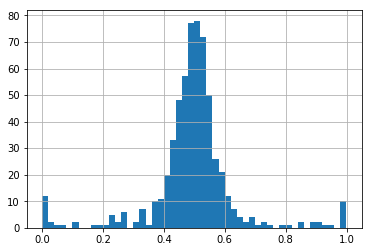

In [31]:
vecs_df.mean().hist(bins=50)

### 1) + 2: Sum of attributes values in a loss, where new_loss = old_loss + attr_sum

In [59]:
import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_sample1e4_nonbin_sumloss", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,1,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,1,0,1,0,1
of,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
and,1,0,1,1,0,0,0,0,0,1,...,0,1,1,0,1,1,0,1,0,1
one,0,1,1,1,0,0,0,0,0,1,...,1,0,0,1,1,1,0,1,0,1
in,0,0,1,0,0,0,0,0,1,1,...,0,1,0,1,1,1,0,1,1,1
a,1,0,1,0,0,0,0,0,1,1,...,0,1,1,0,1,1,0,1,1,1
to,0,0,0,0,0,1,0,0,1,1,...,1,1,1,0,1,1,0,1,0,1
zero,0,0,1,1,0,0,0,0,0,1,...,1,0,1,1,1,1,0,0,0,1


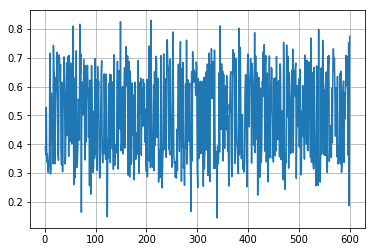

In [60]:
vecs_df.mean().plot(grid=True)

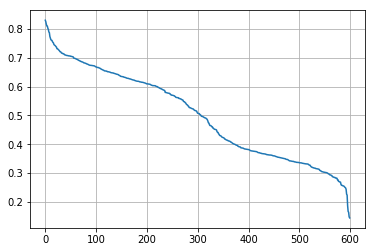

In [61]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

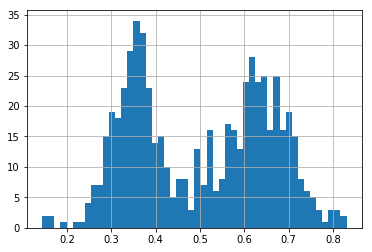

In [28]:
vecs_df.mean().hist(bins=50)

### 1) + 2: Sum of attributes values in a loss, where new_loss = log(sigm(old_loss * attr_sum))

In [63]:
import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_sample1e4_nonbin_sigm_sumloss", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,1,0,1
of,0,0,0,1,0,0,0,0,0,1,...,0,1,1,1,1,1,0,1,0,1
and,0,0,1,1,0,1,0,0,0,1,...,0,1,1,1,1,1,0,1,0,1
one,0,0,1,1,0,0,0,0,0,1,...,1,1,0,0,1,1,0,1,0,1
in,0,0,1,0,0,0,0,0,1,1,...,1,0,1,1,1,1,0,1,1,1
a,0,0,0,0,0,0,0,1,0,1,...,0,1,1,1,1,0,0,1,0,1
to,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,1,0,1,0,1
zero,0,0,1,0,0,0,0,0,0,1,...,1,1,0,1,1,1,0,0,0,1


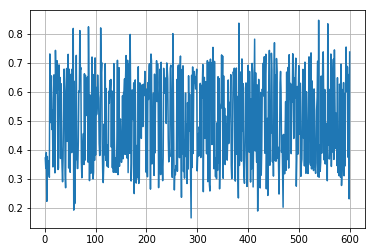

In [64]:
vecs_df.mean().plot(grid=True)

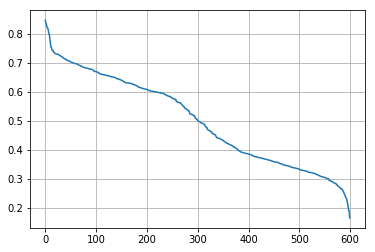

In [65]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

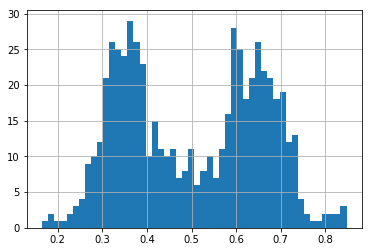

In [37]:
vecs_df.mean().hist(bins=50)

### 1) + 2: Sum of attributes values in a loss, where new_loss = old_loss * attr_sum^2

In [41]:
import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_sample1e4_nonbin_sumloss_pow", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,0,0,1,0,0,0,1,0,1,1,...,0,1,1,1,0,0,1,1,1,1
of,0,0,0,0,0,1,0,0,0,1,...,0,1,1,1,1,1,1,1,1,1
and,1,1,0,1,0,1,0,0,0,1,...,0,0,1,1,1,0,0,1,0,1
one,0,0,0,1,0,0,0,0,0,1,...,1,1,1,1,1,1,0,1,0,1
in,0,0,1,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,0,1
a,1,0,0,0,0,0,0,1,1,1,...,0,1,1,1,1,0,0,1,1,1
to,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,1,1
zero,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,1,1,0,0,1,0


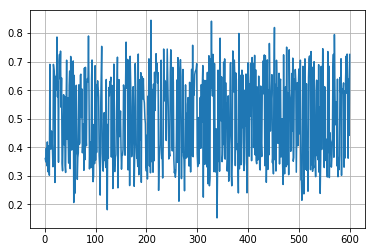

In [42]:
vecs_df.mean().plot(grid=True)

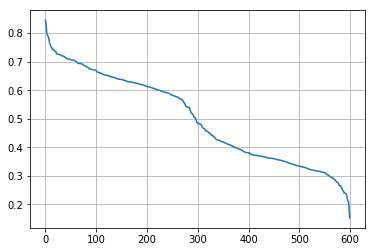

In [55]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

### 1) + 2: Sum of attributes values in a loss, where new_loss = old_loss * attr_sum^2, trained over 50iters

In [69]:
import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_iter50_sample1e4_nonbin_sumloss_pow", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,0,0,1,0,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
of,0,0,1,0,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
and,1,1,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
one,0,0,1,0,1,0,0,0,0,1,...,1,1,1,1,1,1,0,1,0,1
in,0,0,1,0,1,0,0,0,0,1,...,1,0,1,1,1,1,0,1,0,1
a,0,0,1,0,1,0,0,0,0,1,...,0,1,1,0,1,1,0,1,0,1
to,0,0,1,0,1,0,0,0,0,1,...,0,1,1,0,1,1,1,1,0,1
zero,0,0,1,0,1,0,0,0,0,1,...,1,0,1,1,1,1,1,1,0,1


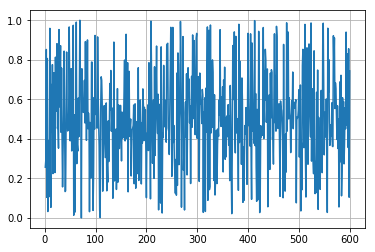

In [70]:
vecs_df.mean().plot(grid=True)

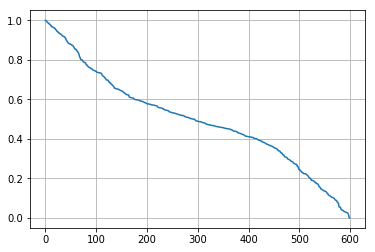

In [71]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

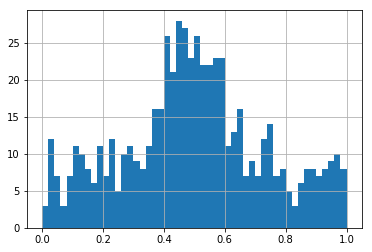

In [72]:
vecs_df.mean().hist(bins=50)

### 2: Sum of attributes values in a loss, where new_loss = old_loss * attr_sum^2, trained over 50iters, wout 1)

In [34]:
# accuracies: 13.807982740021574, 11.689559120161368, 12.570819543389241

import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_sample1e4_nonbin_sumloss_pow_orig_alphas", 
                      skiprows=[0, 1], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,1,0,1,0,1,0,0,0,0,1,...,1,1,1,1,1,1,0,1,0,1
of,0,0,1,0,1,0,0,0,0,1,...,1,1,1,1,1,1,0,1,0,1
and,0,0,1,0,1,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,1
one,0,1,1,0,1,0,0,0,0,1,...,1,0,1,1,1,1,0,1,0,1


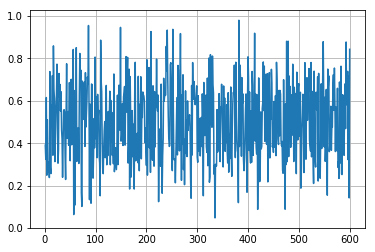

In [35]:
vecs_df.mean().plot(grid=True)

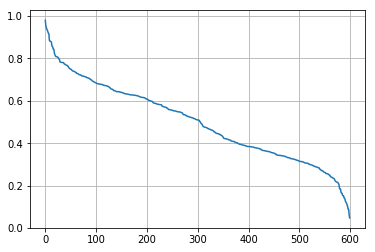

In [36]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

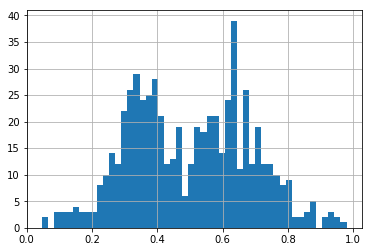

In [37]:
vecs_df.mean().hist(bins=50)

### 1)^2 + 2: Sum of attributes values in a loss, where new_loss = old_loss * attr_sum^2

In [16]:
# accuracies:
# 13.686623516720603, 12.208241283258092, 12.82324563863802

import pandas as pd
from nltk.corpus import wordnet as wn

vecs_df = pd.read_csv("../vectors/modif/1b600_vectors_sample1e4_nonbin_sumloss_pow_alpha_pow", 
                      skiprows=[0, 1], header=None, sep=" ")

vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
of,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,1,0,1,1,1
and,1,0,1,0,0,1,0,0,0,1,...,0,1,1,1,1,1,0,1,0,1
one,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,1,0,1,0,1


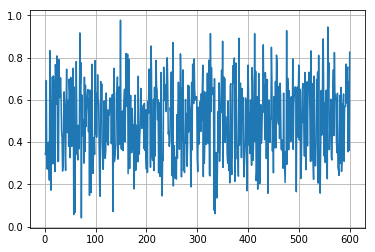

In [17]:
vecs_df.mean().plot(grid=True)

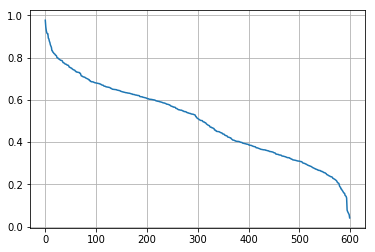

In [18]:
vecs_df.mean().sort_values(ascending=False).reset_index()[0].plot(grid=True)

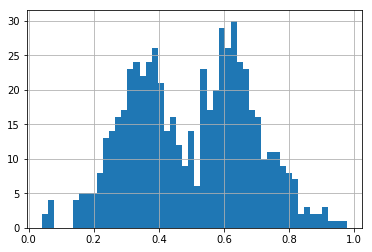

In [19]:
vecs_df.mean().hist(bins=50)

## Correlations with morphological tags

In [20]:
import majka

morph = majka.Majka("../data/w-lt.en.fsa")
morph.flags |= majka.IGNORE_CASE  # ignore the word case whatsoever
morph.tags = True  # turn tag processing back on (default)

morph.find('go')

[{'lemma': 'go', 'tags': {'other': 'NN'}},
 {'lemma': 'go', 'tags': {'other': 'VB'}},
 {'lemma': 'go', 'tags': {'other': 'VBP'}}]

In [21]:
def tags_for_word(word):
     return set([lemma["tags"]["other"] for lemma in morph.find(str(word))])

In [22]:
tags_for_word("go")

{'NN', 'VB', 'VBP'}

In [23]:
word_tags = dict()
for word in vecs_df.index.values:
    word_tags[word] = tags_for_word(word)
    
all_tags = set.union(*word_tags.values())
all_tags

{'CC',
 'DT',
 'EX',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'MD+RB',
 'NN',
 'NNS',
 'PDT',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB'}

In [24]:
for tag in all_tags:
    vecs_df[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_df.index]

In [25]:
vecs_df.head()

,1,2,3,4,5,6,7,8,9,10,...,PDT,WRB,WP$,TO,PRP,WDT,PRP$,RBS,VBP,VBZ
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
the,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
of,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
and,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
one,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
corr_df = corr_df.sort_index(axis=1)
plt.figure(figsize = (20, 20))
sns.heatmap(corr_df, annot=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = vecs_df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr_df, annot=True)

### Iteration over correlations

Inspect a level of top correlation depending on a size of word2bit vector. 

In [29]:
def top_corr_for_vecfile(vecfile_path, vec_length=600):
    vecs_df = pd.read_csv(vecfile_path, skiprows=[0, 1], header=None, sep=" ")
    vecs_df = vecs_df.set_index(0)
    vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
    vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
    vecs_df = vecs_df.replace(vecs_df.values.min(), 0)

    vecs_df = vecs_df.astype('int8')
    
    for tag in all_tags:
        vecs_df[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_df.index]
    
    corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
    return corr_df.max()

In [30]:
epochs = 10

# vec_range = list(range(10, 110, 10))
vec_range = [600]
print(vec_range)

vec_files = ["../vectors/modif/1b%s_vectors_sample1e4_nonbin_sumloss_pow_alpha_pow" % vec_size for vec_size in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
    corr_for_dims_df["%s dims" % vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i], 
                                                                              vec_length=vec_range[vec_dim_i])

[600]


/home/michal/miniconda3/envs/doc_analyzer/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


### Modified vectors correlations

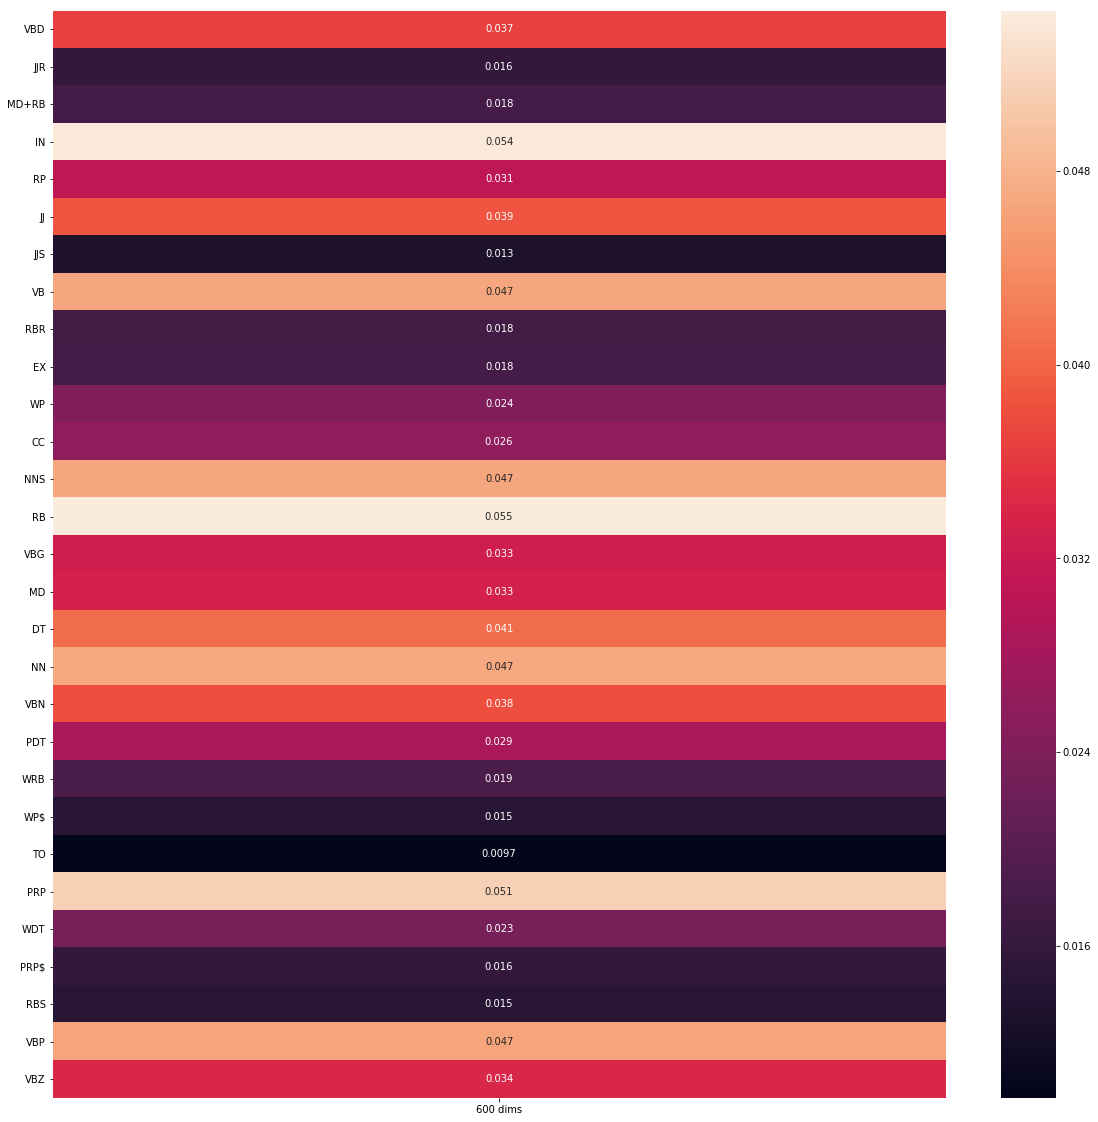

In [33]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

### Original cells correlations over dimensions (dim 600 can be compared to the above)

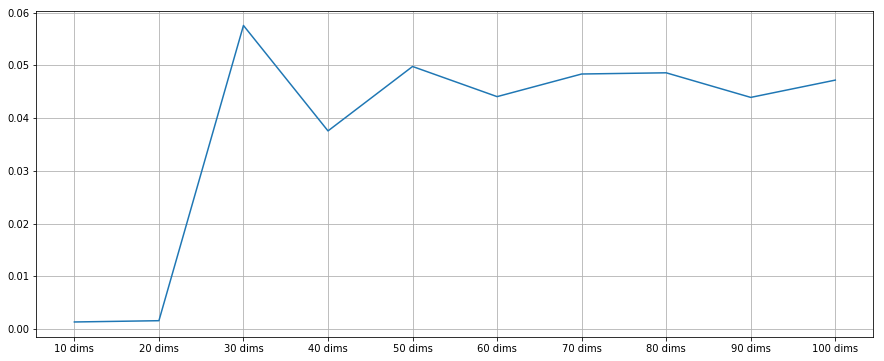

In [15]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True, xticks=range(len(corr_for_dims_df.mean().index)))

In [ ]:
epochs = 10

vec_range = list(range(10, 110, 10)) + list(range(150, 1500, 100))
vec_files = ["../vectors/1b%sd_vectors_e%s_nonbin" % (vec_len, epochs) for vec_len in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
        corr_for_dims_df[vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i])
    
corr_for_dims_df.sort_index(inplace=True, axis=1)

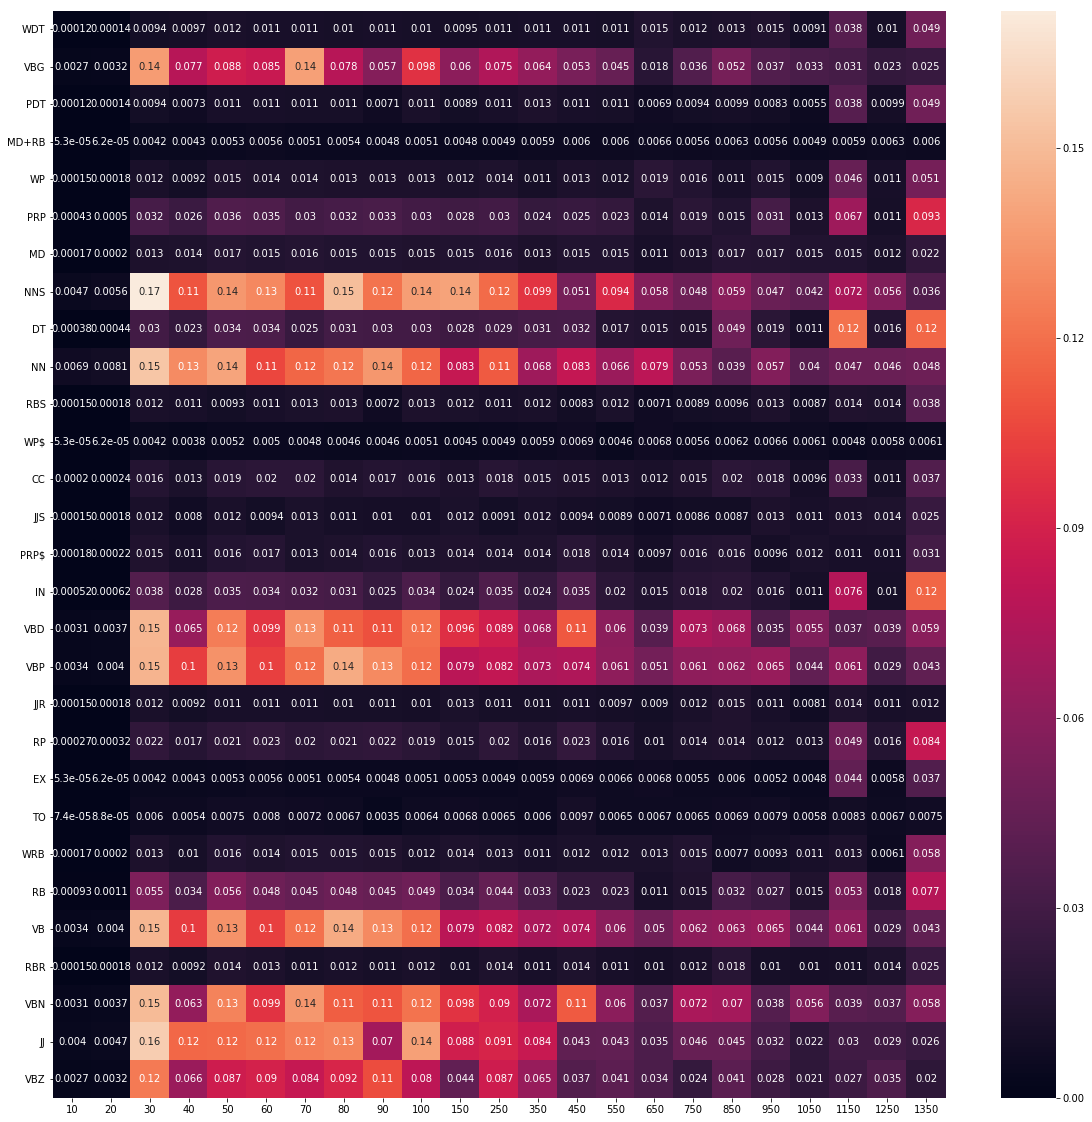

In [17]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

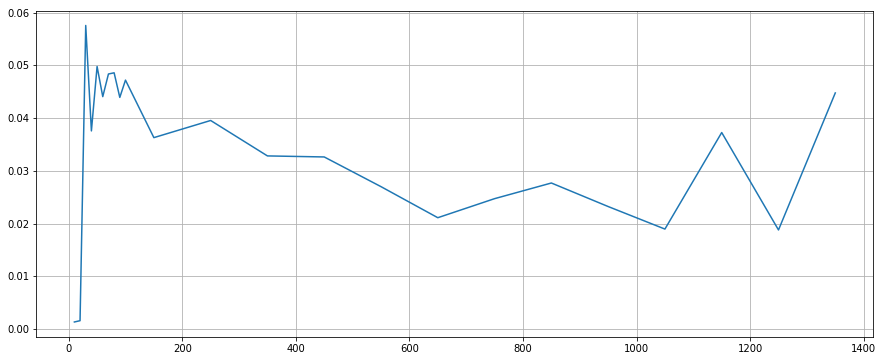

In [19]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True)